In [1]:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Problem 5

In [2]:
# Generating random data
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

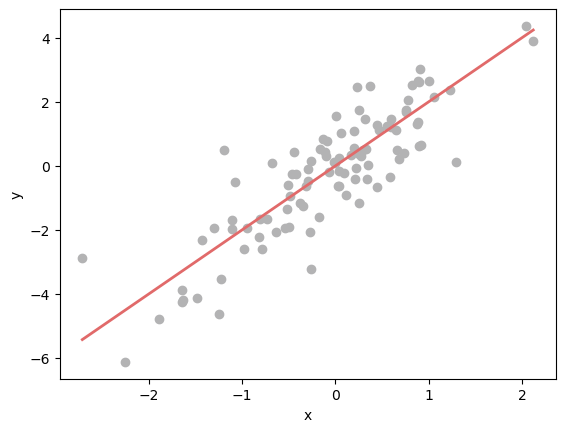

In [3]:
# Plot a scatter plot of x and y
plt.scatter(x, y, color="#B3B3B4")
x_arr = np.linspace(min(x), max(x), 100)
y_true = 2 * x_arr
plt.plot(x_arr, y_true, color='#E16A6A', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Part a.

In [4]:
# Fit ordinary least squares model without intercept of x onto y
model = sm.OLS(endog=y, exog=x)
result = model.fit()

In [5]:
# Summary of the results
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                    6.23e-31
Time:                        16:01:33   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient estimate is $\beta=1.9762$, with standard error of $0.117$.

The $t$-statistics is given by $16.898$, and the $p$-value is given by $0.000$, which is smaller than any reasonable significance level. Hence, we reject the null hypothesis. 

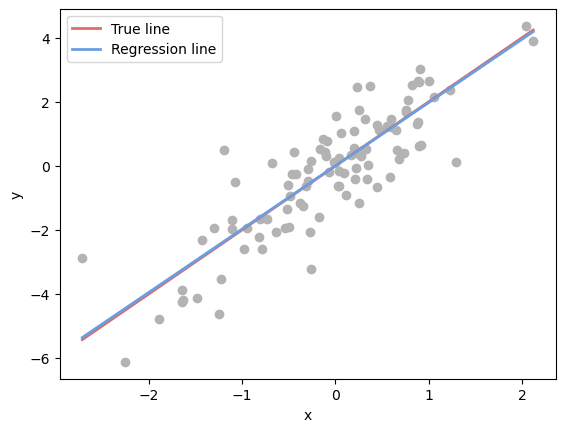

In [6]:
# Plot a scatter plot of x and y with the regression line
plt.scatter(x, y, color="#B3B3B4")
x_arr = np.linspace(min(x), max(x), 100)
y_true, y_reg = 2 * x_arr, 1.9762 * x_arr
plt.plot(x_arr, y_true, color='#E16A6A', lw=2, label='True line')
plt.plot(x_arr, y_reg, color='#6A9EE1', lw=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

From the above graph, we see that the slope is clearly non-zero. Therefore, intuitively we should expect the p-value to be small.

### Part b.

In [7]:
# Fit ordinary least squares model without intercept of y onto x
model = sm.OLS(endog=x, exog=y)
result = model.fit()

In [8]:
# Summary of the results
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                    6.23e-31
Time:                        16:01:36   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient estimate is $\beta=0.3757$, with standard error of $0.022$.

The $t$-statistics is given by $16.898$, and the $p$-value is given by $0.000$, which is smaller than any reasonable significance level. Hence, we reject the null hypothesis. 

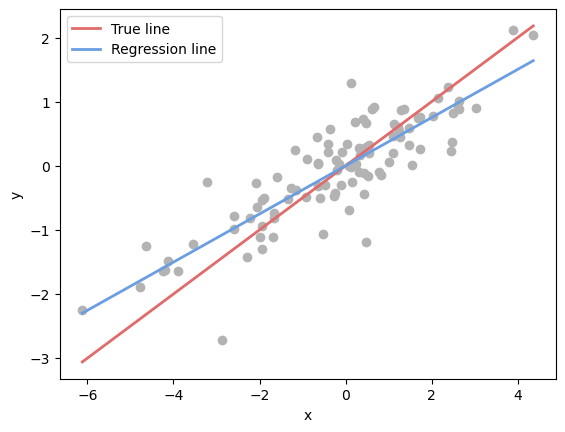

In [9]:
# Plot a scatter plot of y and x with the regression line
plt.scatter(y, x, color="#B3B3B4")
y_arr = np.linspace(min(y), max(y), 100)
x_true, x_reg = 0.5 * y_arr, 0.3757 * y_arr
plt.plot(y_arr, x_true, color='#E16A6A', lw=2, label='True line')
plt.plot(y_arr, x_reg, color='#6A9EE1', lw=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

From the above graph, we see that the slope is clearly non-zero. Therefore, intuitively we should expect the p-value to be small. However, note that the OLS estimate is far from the true value, even though visually it seems to be a good fit

### Part c.

Theoretically, if $\beta$ is the slope estimated from part (a), then the slope estimated from part (b) should be around $1/\beta$. However, this is not true in our case since the OLS estimate differs significantly in part (b).</br> 
</br> 
Also, note that the t-statistics and p-value for both problem happen to be the same, we will justify this in part (d) and (e).

### Part d.

We have 
$$
\begin{align*}
t &= \frac{\sum_i x_iy_i/\sum_i x_i^2}{\sqrt{\sum_i (y_i-x_i\hat{\beta}^2)^2/(n-1)\sum_ix_i^2}}\\
&= \frac{\sqrt{n-1}\sum_i x_iy_i}{\sqrt{\sum_i x_i^2}\sqrt{\sum_i (y_i-\beta x_i)^2}}\\
&= \frac{\sqrt{n-1}\sum_i x_iy_i}{\sqrt{\sum_i x_i^2}\sqrt{\sum_i (y_i-\frac{\sum_j x_jy_j}{\sum_j x_j^2} x_i)^2}}\\
&= \frac{\sqrt{n-1}\sum_i x_iy_i}{\sqrt{\sum_i x_i^2}\sqrt{\sum_i y_i^2-\frac{(\sum_i x_iy_i)^2}{\sum_i x_i^2}}}\\
&= \frac{\sqrt{n-1}\sum_i x_iy_i}{\sqrt{\sum_i x_i^2\sum_i y_i^2-(\sum_i x_iy_i)^2}}\\
\end{align*}
$$
We now show this numerically.

In [10]:
# Verifying the formula for t-value numerically
n = len(x)
xx, xy, yy = np.dot(x, x), np.dot(x, y), np.dot(y, y)
t = (n - 1) ** 0.5 * xy / (xx * yy - xy ** 2) ** 0.5
t

16.8984170630351

Which is the same $t$-value we computed earlier.

### Part e.

Since the formula in part (d) is symmetric, it follows that the $t$-statistics would be the same if we reverse $x$ and $y$.

### Part f.

In [11]:
# Perform linear regression of y onto x with intercept
x_withIntercept = sm.add_constant(x)
model = sm.OLS(y, x_withIntercept)    
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.74e-30
Time:                        16:01:39   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.101     -0.756      0.4

In [12]:
# Perform linear regression of x onto y with intercept
y_withIntercept = sm.add_constant(y)
model = sm.OLS(x, y_withIntercept)    
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.74e-30
Time:                        16:01:40   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.044      0.216      0.8

We see that the $t$-statistics for $\beta_1$ for both model is $16.734$.

## Problem 6.

In [27]:
# Importing abalone data
filepath = "/Users/raymondtsao/Desktop/STAT 154/HW 2/abalone.csv"
abalone = pd.read_csv(filepath)

In [31]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Part 1.

In [84]:
# Filter all rows whose "Sex" is not "M" or "F"
abalone = abalone[(abalone["Sex"] == "M") | (abalone["Sex"] == "F")]

# Remove all columns other than "Sex", "Lenght", and "Diameter" 
abalone = abalone[["Sex", "Length", "Diameter"]]

In [85]:
abalone

,Sex,Length,Diameter
0,M,0.455,0.365
1,M,0.350,0.265
2,F,0.530,0.420
3,M,0.440,0.365
6,F,0.530,0.415
...,...,...,...
4172,F,0.565,0.450
4173,M,0.590,0.440
4174,M,0.600,0.475
4175,F,0.625,0.485


### Part 2.

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# Split into training and testing set
abalone_train, abalone_test = train_test_split(abalone, test_size=0.5, random_state=0)

In [88]:
abalone_train

,Sex,Length,Diameter
1705,M,0.640,0.525
852,M,0.565,0.450
754,M,0.650,0.515
2265,F,0.720,0.575
2122,F,0.435,0.350
...,...,...,...
1013,F,0.625,0.475
1145,M,0.580,0.455
2403,M,0.290,0.225
3833,M,0.535,0.410


In [89]:
abalone_test

,Sex,Length,Diameter
1405,M,0.655,0.535
877,F,0.635,0.500
231,M,0.565,0.440
1718,M,0.650,0.505
2270,F,0.600,0.475
...,...,...,...
3693,M,0.650,0.495
2989,M,0.560,0.425
3592,M,0.655,0.525
428,F,0.560,0.455


### Part 3.

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [91]:
# Extracting features and response variables
X_train, y_train = abalone_train[["Length", "Diameter"]], abalone_train["Sex"].values
X_test, y_test = abalone_test[["Length", "Diameter"]], abalone_test["Sex"].values

In [92]:
# Fitting LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [93]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

### Part 4.

We compare the LDA/QDA model prediction with the ground truth using the accuracy metric, which is given by </br>

$$\text{Accuracy}=\frac{\text{Number of correct predictions}}{\text{Total number of samples}}$$

In [94]:
def getAccuracy(model, X_test, y_test):
    predictions = model.predict(X_test)
    numCorrect = np.count_nonzero(predictions == y_test)
    return numCorrect / len(y_test) * 100

In [135]:
# Prediction using LDA and QDA model
lda_predictions = lda.predict(X_test)
qda_predictions = qda.predict(X_test)

In [130]:
# Assess LDA model accuracy
lda_accuracy = getAccuracy(lda, X_test, y_test)
print(f"The accuracy of LDA model is {lda_accuracy}%")

The accuracy of LDA model is 52.256699576868826%


In [131]:
# Assess QDA model accuracy
qda_accuracy = getAccuracy(qda, X_test, y_test)
print(f"The accuracy of QDA model is {qda_accuracy}%")

The accuracy of QDA model is 49.647390691114246%


Based on the results, we see that LDA model performs slightly better than QDA model.</br>

### Part 5. 

Since plotting training data and testing data together makes the graph hard to visualize, we plot training and testing data on two separate graphs. In the plot for training data, pink dots represents female and blue dot represents male.</br>
This holds true for the testing data plot, except points are colored red if the prediction is wrong

In [132]:
def plot(predictions, modelName):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    
    # Plotting training data
    ax[0].set_title(f"Training data")
    for label in ['F', 'M']:
        ax[0].scatter(
            X_train[y_train == label]['Length'],
            X_train[y_train == label]['Diameter'],
            label=label,
            c="#f5c0bf" if label == 'F' else '#6A9EE1',
            marker='o',
            s=3
        )
    ax[0].legend()

    # Plotting testing data
    ax[1].set_title(f"{modelName} performance on testing data")
    for i in range(len(X_test)):
        if predictions[i] != y_test[i]:
            ax[1].scatter(
                X_test.iloc[i]['Length'],
                X_test.iloc[i]['Diameter'],
                c='#f55b58',
                marker='o',
                s=3
            )
        else:
            ax[1].scatter(
                X_test.iloc[i]['Length'],
                X_test.iloc[i]['Diameter'],
                c="#f5c0bf" if y_test[i] == 'F' else '#6A9EE1',
                marker='o',
                s=3
            )

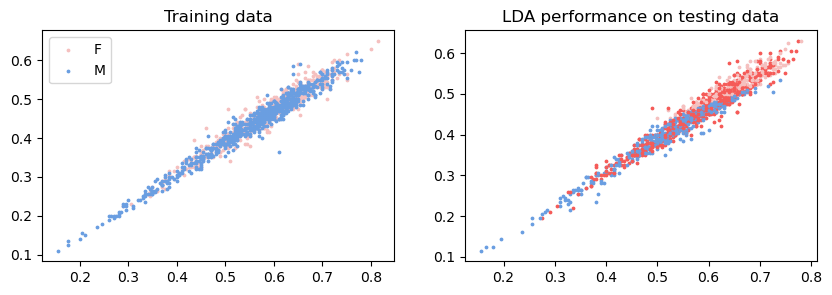

In [136]:
plot(lda_predictions, "LDA")

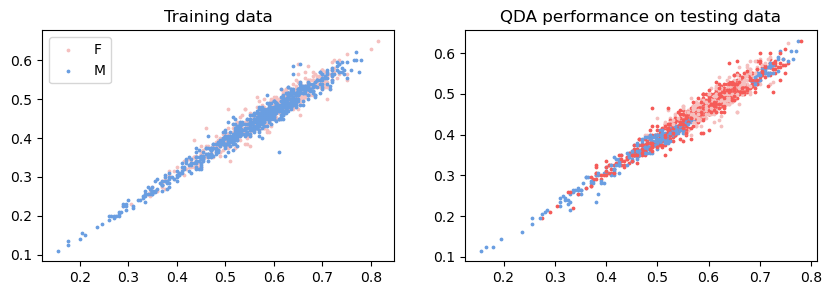

In [137]:
plot(qda_predictions, "QDA")

From the above plot, we see that there's a significant amount of data being misclassified.